In [1]:
from itertools import combinations

import pandas as pd

import csv

import glob

import os

import seaborn as sns

from sklearn import tree

from sklearn.datasets import load_iris

import pydotplus

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import numpy as np

from tqdm import tqdm

varidDurationPrefix = 'varied-'
constnatdurationPrefix = 'constant200-'

In [2]:
variedinputCSV = 'final-merge-all-varied-first-pass.csv'
constantCSVPath = '/Users/mingshi/Desktop/PythonProject/Range_alignment/final-merge-all-200ms-firstpass.csv'
data = pd.read_csv(variedinputCSV)

In [3]:
def flatten_list_of_lists(lst_of_lsts):
    return [item for sublist in lst_of_lsts for item in sublist]


def get_featureList_index() -> list[str]:
        file_paths = 'feature_name_list_compare.txt'
        filename = file_paths

        content_list = []

        with open(filename, 'r') as file:
            content_list = [line.strip() for line in file]

        feature_name_list = content_list

        return feature_name_list


In [4]:
# Nan-laughter checking
nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
#Correctedd fixed

query_result = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'M002_S07') &
    (data['Start Time - ms'] == 313464) &
    (data['End Time - ms'] == 314672)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
    #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------   
#row 2
query_result2 = data[
    (data['Session id'] == 'S07') &
    (data['Participant id'] == 'P017') &
    (data['Start Time - ms'] == 313354) &
    (data['End Time - ms'] == 313477)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result2.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Mirthful'
      #oiriginal is Nan 
    data.at[idx, 'concise merge type'] = '[laugh]-Mirthful'
 #-----------  
 #row 3
query_result3 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'M003_S20') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result3.index:
    data.at[idx, 'CV - merge - M - L - S'] = '[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'
    
#row 4 corrected ness
query_result4 = data[
    (data['Session id'] == 'S20') &
    (data['Participant id'] == 'P043') &
    (data['Start Time - ms'] == 352456) &
    (data['End Time - ms'] == 353354)
]

# Update the values in 'CV - merge - M - L - S' and 'concise merge type' columns
for idx in query_result4.index:
    data.at[idx, 'CV - merge - M - L - S'] ='[laugh]-Discourse'
    data.at[idx, 'concise merge type'] = '[laugh]-Discourse'

nan_rows_check = data[data['concise merge type'].isnull()]
nan_rows_check
# Transforming any concise merge type containing "null" into Ambiguous
data.loc[data['concise merge type'].str.contains('null'), 'concise merge type'] = 'Ambiguous'
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
data['concise merge type'] = data['concise merge type'].replace(discoueseV, discoureLaugh)
data['concise merge type'] = data['concise merge type'].replace(discourseS, discoureLaugh)

In [5]:
responseList = set(data['concise merge type'].tolist())
responseList

{'Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Mirthful'}

 process the paricipant column of datafame if the value cotain "M" transform it into 0 and value contain "P" to "1"

Finishing preprceossng

In [7]:
data['Duration - ms']=data['Duration - ms']/1000

In [9]:
discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'


In [10]:
discouseLaughterDF = data[data['concise merge type']==discoureLaugh]

In [12]:
discouseLaughterDFDuration = discouseLaughterDF['Duration - ms'].tolist()

In [ ]:
discouseLaughterDFDuration

In [17]:
mirthfulLaughterDF = data[data['concise merge type']==mirthfulLaugh]
mirthfulLaughterDFDuration = mirthfulLaughterDF['Duration - ms'].tolist()

In [18]:
mirthfulLaughterDFDuration
mirthfulLaughterDFDuration

[0.526,
 0.974,
 1.081,
 0.546,
 0.951,
 0.965,
 0.366,
 1.032,
 1.132,
 0.976,
 1.081,
 1.61,
 0.823,
 0.668,
 2.234,
 0.634,
 1.032,
 1.362,
 1.055,
 0.673,
 0.617,
 0.864,
 0.596,
 1.096,
 0.823,
 0.617,
 1.246,
 0.872,
 0.46,
 1.174,
 1.301,
 1.196,
 1.163,
 0.719,
 0.742,
 3.164,
 0.634,
 2.334,
 0.704,
 0.7,
 3.164,
 1.014,
 2.257,
 0.565,
 1.486,
 3.164,
 0.973,
 0.355,
 0.9,
 0.669,
 0.601,
 0.366,
 0.358,
 1.129,
 0.631,
 1.078,
 1.027,
 0.989,
 0.728,
 1.856,
 2.075,
 1.537,
 0.366,
 0.686,
 0.631,
 2.536,
 1.856,
 0.674,
 0.702,
 0.991,
 0.613,
 0.597,
 1.524,
 1.754,
 0.873,
 1.543,
 0.929,
 0.746,
 0.54,
 0.475,
 1.208,
 1.22,
 1.057,
 1.156,
 0.702,
 0.823,
 1.19,
 0.624,
 0.929,
 0.746,
 0.672,
 0.54,
 0.993,
 1.05,
 0.123,
 1.003,
 0.979,
 1.057,
 0.895,
 0.564,
 0.877,
 0.216,
 1.724,
 1.135,
 1.416,
 0.56,
 0.974,
 1.029,
 1.08,
 1.724,
 0.616,
 0.588,
 0.567,
 1.135,
 0.733,
 0.734,
 1.24,
 0.581,
 0.618,
 0.682,
 0.618,
 0.935,
 0.935,
 0.874,
 0.773,
 0.523,
 2.917

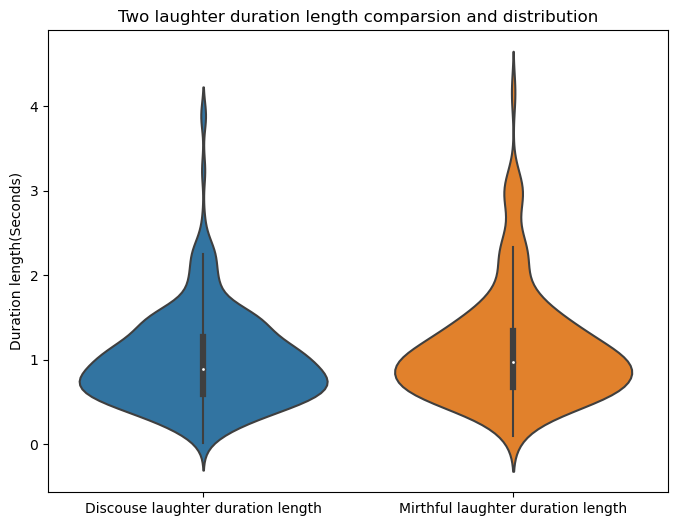

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
list1 =discouseLaughterDFDuration
list2 = mirthfulLaughterDFDuration
data = [list1, list2]
plt.figure(figsize=(8, 6))
sns.violinplot(data=data)

plt.title('Two laughter duration length comparsion and distribution')
plt.ylabel('Duration length(Seconds)')
plt.xticks(ticks=[0, 1], labels=['Discouse laughter duration length', 'Mirthful laughter duration length'])

saveNameImportance = 'laughterDurationComparsion.png'
plt.savefig(saveNameImportance)
plt.show()

# Investigate previous event

In [22]:
data

[[0.777,
  0.67,
  0.588,
  1.55,
  1.413,
  0.474,
  0.596,
  0.409,
  0.514,
  0.981,
  0.905,
  1.135,
  0.939,
  1.183,
  0.777,
  0.63,
  1.156,
  1.405,
  1.021,
  0.642,
  0.594,
  0.758,
  0.639,
  0.673,
  0.566,
  1.337,
  0.519,
  1.129,
  2.329,
  0.674,
  1.375,
  0.768,
  1.105,
  0.709,
  0.709,
  0.575,
  1.279,
  1.3,
  1.686,
  1.511,
  0.895,
  1.224,
  0.814,
  2.117,
  1.083,
  1.12,
  1.636,
  1.111,
  0.888,
  0.89,
  2.137,
  1.178,
  1.317,
  0.598,
  1.179,
  1.496,
  0.57,
  0.435,
  0.717,
  1.349,
  1.213,
  1.82,
  1.477,
  0.801,
  0.797,
  1.392,
  1.066,
  0.513,
  0.815,
  1.085,
  0.651,
  1.41,
  1.419,
  0.359,
  0.475,
  0.373,
  0.773,
  1.085,
  1.21,
  1.562,
  0.768,
  0.369,
  0.747,
  1.349,
  0.706,
  0.76,
  0.458,
  1.439,
  1.096,
  2.052,
  0.452,
  0.288,
  1.2,
  0.802,
  0.872,
  1.234,
  0.857,
  0.569,
  2.225,
  0.571,
  0.178,
  0.516,
  1.195,
  0.975,
  1.13,
  1.471,
  0.442,
  0.63,
  0.65,
  0.137,
  0.77,
  2.016,
  2.667,
 